In [1]:
import numpy as np
import sympy as smp
from sympy import Matrix, solve_linear_system
from sympy.solvers.solvers import solve_linear_system_LU
from sympy import *

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

smp.init_printing()
pi = smp.pi

## Define the Symbols Used

In [2]:
# Constants
alpha, beta, k1, k2, k3, d = smp.symbols(r'\alpha, \beta, k_1, k_2, k_3, d', real=True)
J = smp.symbols(r'J', real=True)

#Variables
AA, BB, CC, DD = smp.symbols(r'A, B, C, D')

Here we define our own complex exponential function. We don't use sympys exponential function because sympy has problems converting from complex exponentials to sines and cosines, and this ensures that our final answer is real.

In [3]:
def c_exp(k, J):
    return cos(k*d)+J*sin(k*d)

## Define and Solve the Equations

Note that ''AA'' corresponds to the variable ''a'' on the written work, and so on. The standard of sympy is that when it solves the equations, it assumes they are all equal to zero.

In [4]:
E1 = AA - BB - CC + 1
E2 = AA + beta*BB -beta*CC - 1
E3 = BB*c_exp(k2, J) + CC*c_exp(-k2, J) - DD*c_exp(k3, J)
E4 = BB*c_exp(k2, J) - CC*c_exp(-k2, J) - alpha*DD*c_exp(k3, J)

sols = solve([E1, E2, E3, E4], [AA, BB, CC, DD])

## Compute T and R

We have to multiply by the complex conjugate, so we replace $J$ with $-J$ in the second expression.

In [5]:
T = (alpha*beta*sols[DD]*sols[DD].subs(J, -J)).simplify()
R = (sols[AA]*sols[AA].subs(J, -J)).simplify()

Now we need to sub $\alpha$, $\beta$, and $k$ into the equations above.

$$\alpha=\frac{v_2}{v_3}=\frac{n_3}{n_2} \hspace{8mm} \beta = \frac{v_1}{v_2}=\frac{n_2}{n_1} \hspace{8mm} k_i=\frac{\omega}{v_i}=\frac{\omega n_i}{c}$$

We also need to replace $J$ with $i$, which we held off from doing in the first place.

In [6]:
# Constants
n1, n2, n3, omega, cc = smp.symbols(r'n_1, n_2, n_3, \omega, c', real=True)

## Print T and R

Note that there are a few more simplifications that can probably be done with the trigonometric expressions, but these expressions are certainly short enough and one can easily evaluate them when the quantities are specified.

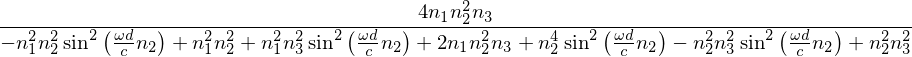

In [7]:
T_fin = T.subs({alpha:n3/n2, beta:n2/n1, k2:omega*n2/cc, k3:omega*n3/cc, J:I}).simplify()
T_fin

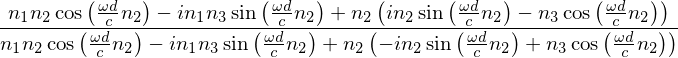

In [8]:
sols[AA].subs({alpha:n3/n2, beta:n2/n1, k2:omega*n2/cc, k3:omega*n3/cc, J:I}).simplify()

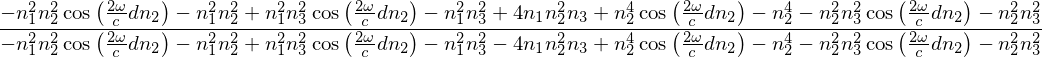

In [9]:
R_fin = R.subs({alpha:n3/n2, beta:n2/n1, k2:omega*n2/cc, k3:omega*n3/cc, J:I}).simplify()
R_fin

## Show that Their Sum is 1

In [10]:
(T_fin+R_fin).simplify()

# A Fun Little Extension

Lets plot what happens to these coefficients as $d$ gets bigger over a water, glass, air boundary (through a fishbowl). Lets assume the frequency is around that of visible light.

In [11]:
spd_of_light = 3*10**8
freq_of_light = (500*10**12)/(2*smp.pi)
indx_1 = 1.33
indx_2 = 1.52
indx_3 = 1

Substitute these vlaues into the expressions.

In [12]:
T_eval = T_fin.subs({n1: indx_1, n2: indx_2, n3: indx_3, cc: spd_of_light, omega:freq_of_light})
R_eval = R_fin.subs({n1: indx_1, n2: indx_2, n3: indx_3, cc: spd_of_light, omega:freq_of_light})

Functions to get transmission and reflection coefficients.

In [13]:
def get_T(dd):
    return T_eval.subs({d:dd}).evalf()
def get_R(dd):
    return R_eval.subs({d:dd}).evalf()

Get the values.

In [14]:
d_vals = np.linspace(0,0.0001,1000)
T_vals = np.array([get_T(i) for i in d_vals])
R_vals = np.array([get_R(i) for i in d_vals])

Plot.

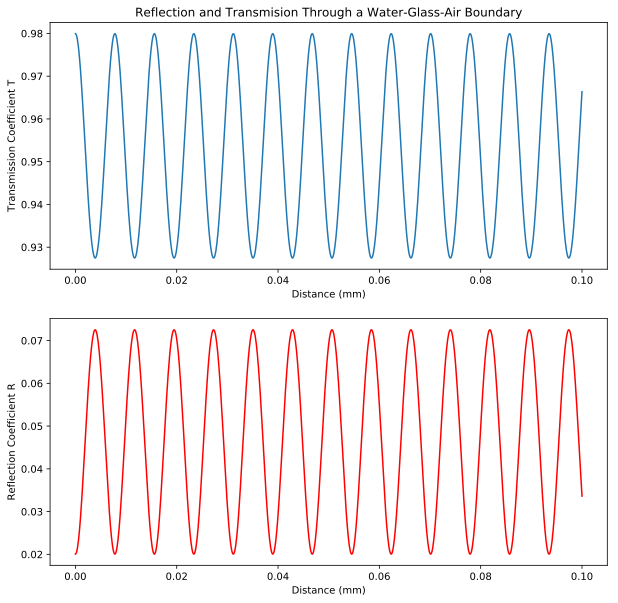

In [15]:
fig, ax = plt.subplots(2,1, figsize=(10,10))

ax[0].plot(d_vals*1000, T_vals)
ax[1].plot(d_vals*1000, R_vals, c='r')

ax[0].set_ylabel('Transmission Coefficient T')
ax[1].set_ylabel('Reflection Coefficient R')

ax[0].set_title('Reflection and Transmision Through a Water-Glass-Air Boundary')

[a.set_xlabel('Distance (mm)') for a in ax]

plt.show()

These oscillations are present in small distances. Over a large distance scales, they remain relatively constant.

In [16]:
d_vals = np.linspace(0,1,10000)
T_vals = np.array([get_T(i) for i in d_vals])
R_vals = np.array([get_R(i) for i in d_vals])

We plot again. Note that any apparent frequencies are actually due to a sampling rate greater than the nyquist frequency.

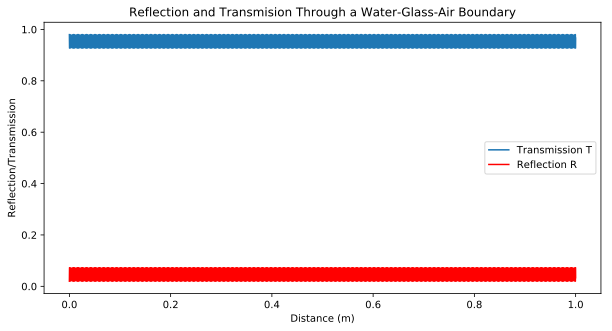

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(d_vals, T_vals, label="Transmission T")
ax.plot(d_vals, R_vals, c='r', label="Reflection R")

ax.set_ylabel('Reflection/Transmission')
ax.set_xlabel('Distance (m)')
ax.set_title('Reflection and Transmision Through a Water-Glass-Air Boundary')

ax.legend()

plt.show()

So the transmission and reflection appears to be independent of the amount of glass used between the water and the air.